In [1]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/HP/Desktop/')
os.getcwd()

'C:\\Users\\HP\\Desktop'

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 36
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [4]:
df = pd.DataFrame()
df["Reviews"] = reviews
df.head()

,Reviews
0,Not Verified | Regarding the aircraft and seat...
1,Not Verified | I travelled with British Airway...
2,Not Verified | Food was lousy. Who ever is pl...
3,✅ Trip Verified | Had the worst experience. Th...
4,✅ Trip Verified | The ground staff were not h...


In [6]:
!pip install nltk

In [10]:
# Preprocess the text data by removing stopwords and lemmatizing the words
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
import demoji
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def preprocess_text(text):
    stopwords_list = stopwords.words('english')
    lemmatizer = WordNetLemmatizer()
    text = text.lower()
    demoji.download_codes()
    text = demoji.replace_with_desc(text, '')
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stopwords_list]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


In [11]:
df['Processed_Reviews'] = df['Reviews'].apply(preprocess_text)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_9704\3940111548.py:16: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


,Reviews,Processed_Reviews
0,Not Verified | Regarding the aircraft and seat...,verified regarding aircraft seat business clas...
1,Not Verified | I travelled with British Airway...,verified travelled british airway sweden los a...
2,Not Verified | Food was lousy. Who ever is pl...,verified food lousy ever planning asian hindu ...
3,✅ Trip Verified | Had the worst experience. Th...,check mark button trip verified worst experien...
4,✅ Trip Verified | The ground staff were not h...,check mark button trip verified ground staff h...
...,...,...
3532,LHR-JFK-LAX-LHR. Check in was ok apart from be...,lhrjfklaxlhr check ok apart snapped early chec...
3533,LHR to HAM. Purser addresses all club passenge...,lhr ham purser address club passenger name boa...
3534,My son who had worked for British Airways urge...,son worked british airway urged fly british ai...
3535,London City-New York JFK via Shannon on A318 b...,london citynew york jfk via shannon a318 reall...


In [12]:
# Perform topic modelling using Latent Dirichlet Allocation (LDA)
vectorizer = TfidfVectorizer(max_features=5000)
tfidf = vectorizer.fit_transform(df['Processed_Reviews'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf)
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx))
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topic 0:
moscow bari birthday rtn 4a seychelles kalamata shannon eco luxurious
Topic 1:
flight ba customer hour day told check cancelled airway british
Topic 2:
eurowings a380800 charger cello mom bilbao 72 ec fabric ranking
Topic 3:
flight seat ba good food crew service cabin class time
Topic 4:
ko catania quibble zagreb kansa avianca rotten catered approved pointing


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
# Perform sentiment analysis using SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['Reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


In [16]:
df

,Reviews,Processed_Reviews,sentiment_score,sentiment_label
0,Not Verified | Regarding the aircraft and seat...,verified regarding aircraft seat business clas...,-0.4541,negative
1,Not Verified | I travelled with British Airway...,verified travelled british airway sweden los a...,-0.9455,negative
2,Not Verified | Food was lousy. Who ever is pl...,verified food lousy ever planning asian hindu ...,-0.7476,negative
3,✅ Trip Verified | Had the worst experience. Th...,check mark button trip verified worst experien...,-0.8604,negative
4,✅ Trip Verified | The ground staff were not h...,check mark button trip verified ground staff h...,-0.8537,negative
...,...,...,...,...
3532,LHR-JFK-LAX-LHR. Check in was ok apart from be...,lhrjfklaxlhr check ok apart snapped early chec...,-0.2003,negative
3533,LHR to HAM. Purser addresses all club passenge...,lhr ham purser address club passenger name boa...,0.8720,positive
3534,My son who had worked for British Airways urge...,son worked british airway urged fly british ai...,0.4516,positive
3535,London City-New York JFK via Shannon on A318 b...,london citynew york jfk via shannon a318 reall...,0.9148,positive


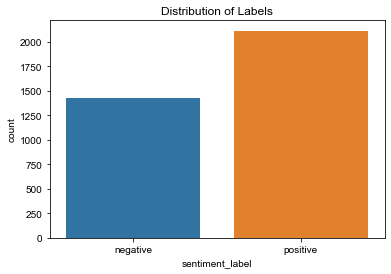

In [33]:
import seaborn as sns
# Check the distribution of labels
sns.countplot(x='sentiment_label', data=df)
plt.title('Distribution of Labels')
plt.show()

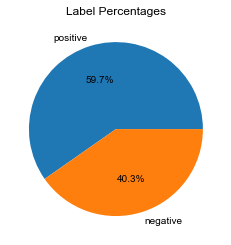

In [28]:
# Calculate the percentage of each label
label_counts = df['sentiment_label'].value_counts(normalize=True) * 100

# Plot a pie chart of the label percentages
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Label Percentages')
plt.show()